In [48]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load Data in Dataframe
import time
start_time = time.time()
train_data = pd.read_csv('Train25.csv')
print("--- %s seconds ---" % (time.time() - start_time))
train_data

--- 90.7232940196991 seconds ---


,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,1129269,3423938309c0311e273f994fb75c17c051248bec00b142...,2018-02-27,0.692903,0.007248,0.008110,0.813047,0.001296,0.182255,0.008221,...,NaN,NaN,NaN,0.005810,0.007510,0.001479,NaN,0.008584,0.003927,0.000265
2,786878,24830d3e3a6739380c1e4f410cdbc1cccd8670ca4efac5...,2017-10-25,0.760664,0.007164,0.003502,0.816307,0.008692,NaN,0.004170,...,NaN,NaN,NaN,0.004483,0.000421,0.003531,NaN,0.005391,0.001890,0.008278
3,417099,136e58c0698fa15569bbb189ed3f67d4d0773eb1f40475...,2017-07-14,0.541180,0.006883,0.592058,0.043188,0.005739,0.140962,0.009141,...,NaN,NaN,NaN,0.001435,0.003579,0.004951,NaN,0.007757,0.002797,0.000894
4,2559303,7613e081c2fa384bfb6b1df0bab37a0ef29a27cccf5e83...,2017-11-17,0.368668,0.031484,0.453274,0.027807,0.002330,0.263603,0.002230,...,NaN,NaN,NaN,0.006034,0.007786,0.009002,NaN,0.008526,0.003591,0.007756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,1976281,5b3ced2cebbe1d518a3a6645fe165577cdaa210e61579a...,2017-05-27,0.606872,0.391428,0.039005,1.008506,0.008201,0.038661,0.007313,...,0.25668,0.004762,0.005549,0.005664,0.007183,0.009182,NaN,0.001837,0.007191,0.001326
1382858,3251323,96380ff3221345f0c80f61597c355958598646b3e024f7...,2017-07-22,0.875765,0.001855,0.030664,1.002463,0.001630,0.104359,0.003367,...,NaN,NaN,NaN,0.009151,0.009526,0.007361,NaN,0.003853,0.009707,0.007231
1382859,3589440,a5d08297343d1c9a6cc82eff919d41ffa5179e95fbb38d...,2017-08-12,0.885838,0.003589,0.008111,1.005659,0.006098,0.144282,0.009497,...,NaN,NaN,NaN,0.006675,0.009127,0.000342,NaN,0.001308,0.009470,0.007563
1382860,1929743,590d8d936b5e7ff008f53b3a34a23e0b26c46c5604f5fa...,2017-10-22,0.773597,0.594307,0.208508,0.073353,0.008069,0.151430,0.001763,...,NaN,NaN,NaN,0.001862,0.003412,0.008345,NaN,0.004714,0.000869,0.008088


In [4]:
#df Shape
train_data.shape

(5531451, 190)

In [5]:
#Data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382862 entries, 0 to 1382861
Columns: 191 entries, Unnamed: 0 to D_145
dtypes: float64(185), int64(2), object(4)
memory usage: 2.0+ GB


In [6]:
#function for extracting objects
def getObjectCol(df):
    # Excluding date column from the dataset just to have numerical data in order to find out the outliers
    DType = ['object']
    df = df.select_dtypes(include=DType)
        
    return df

In [24]:
#function for extracting objects
def getNumericCol(df):
    # Excluding date column from the dataset just to have numerical data in order to find out the outliers
    DType = ['float64','int64']
    df = df.select_dtypes(include=DType)
        
    return df

In [7]:
#Show object col
train_data_objects = getObjectCol(train_data)
train_data_objects

,customer_ID,S_2,D_63,D_64
0,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,CO,O
1,3423938309c0311e273f994fb75c17c051248bec00b142...,2018-02-27,CO,O
2,24830d3e3a6739380c1e4f410cdbc1cccd8670ca4efac5...,2017-10-25,CO,R
3,136e58c0698fa15569bbb189ed3f67d4d0773eb1f40475...,2017-07-14,CL,R
4,7613e081c2fa384bfb6b1df0bab37a0ef29a27cccf5e83...,2017-11-17,CO,R
...,...,...,...,...
1382857,5b3ced2cebbe1d518a3a6645fe165577cdaa210e61579a...,2017-05-27,CO,-1
1382858,96380ff3221345f0c80f61597c355958598646b3e024f7...,2017-07-22,CO,O
1382859,a5d08297343d1c9a6cc82eff919d41ffa5179e95fbb38d...,2017-08-12,CR,O
1382860,590d8d936b5e7ff008f53b3a34a23e0b26c46c5604f5fa...,2017-10-22,CO,R


In [36]:
train_data_objects['S_2'] = \
pd.to_datetime(train_data_objects['S_2'])
train_data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382862 entries, 0 to 1382861
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   customer_ID  1382862 non-null  object        
 1   S_2          1382862 non-null  datetime64[ns]
 2   D_63         1382862 non-null  object        
 3   D_64         1328776 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 42.2+ MB


In [17]:
#Unique values on D_63
train_data_objects['D_63'].unique()

array(['CO', 'CL', 'CR', 'XZ', 'XM', 'XL'], dtype=object)

In [18]:
#Unique values on D_64
train_data_objects['D_64'].unique()

array(['O', 'R', 'U', nan, '-1'], dtype=object)

In [19]:
#shoq percentage of null values
def nullVals(df):
    return round(df.isnull().sum() / df.shape[0] *100,2)

In [20]:
#Checking percantage of null values in objects
nullVals(train_data_objects)

customer_ID    0.00
S_2            0.00
D_63           0.00
D_64           3.91
dtype: float64

In [21]:
#Check duplicate values entries objects
duplicateObs = train_data_objects[train_data_objects.duplicated()]
duplicateObs

,customer_ID,S_2,D_63,D_64


In [22]:
#df Describe
train_data_objects.describe()

/var/folders/06/rkc92dl925n9zc06g826mq2m0000gn/T/ipykernel_95037/2307584430.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_data_objects.describe()


,customer_ID,S_2,D_63,D_64
count,1382862,1382862,1382862,1328776
unique,433708,396,6,4
top,678b74cb7c9bdf1658030632de6058d1d1e375709a0dfa...,2018-02-17 00:00:00,CO,O
freq,11,6766,1030408,728180
first,NaN,2017-03-01 00:00:00,NaN,NaN
last,NaN,2018-03-31 00:00:00,NaN,NaN


In [7]:
#Load Data in Dataframe
health_care = pd.read_csv('healthcare-dataset-stroke-data.csv')
health_care

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
#Show Numeric col
train_data_numeric = getNumericCol(train_data)
train_data_numeric

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,4580744,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,0.005554,NaN,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,1129269,0.692903,0.007248,0.008110,0.813047,0.001296,0.182255,0.008221,0.025794,0.184796,...,NaN,NaN,NaN,0.005810,0.007510,0.001479,NaN,0.008584,0.003927,0.000265
2,786878,0.760664,0.007164,0.003502,0.816307,0.008692,NaN,0.004170,0.006995,NaN,...,NaN,NaN,NaN,0.004483,0.000421,0.003531,NaN,0.005391,0.001890,0.008278
3,417099,0.541180,0.006883,0.592058,0.043188,0.005739,0.140962,0.009141,0.806972,NaN,...,NaN,NaN,NaN,0.001435,0.003579,0.004951,NaN,0.007757,0.002797,0.000894
4,2559303,0.368668,0.031484,0.453274,0.027807,0.002330,0.263603,0.002230,0.860472,NaN,...,NaN,NaN,NaN,0.006034,0.007786,0.009002,NaN,0.008526,0.003591,0.007756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,1976281,0.606872,0.391428,0.039005,1.008506,0.008201,0.038661,0.007313,0.007251,NaN,...,0.25668,0.004762,0.005549,0.005664,0.007183,0.009182,NaN,0.001837,0.007191,0.001326
1382858,3251323,0.875765,0.001855,0.030664,1.002463,0.001630,0.104359,0.003367,0.003067,NaN,...,NaN,NaN,NaN,0.009151,0.009526,0.007361,NaN,0.003853,0.009707,0.007231
1382859,3589440,0.885838,0.003589,0.008111,1.005659,0.006098,0.144282,0.009497,0.003145,NaN,...,NaN,NaN,NaN,0.006675,0.009127,0.000342,NaN,0.001308,0.009470,0.007563
1382860,1929743,0.773597,0.594307,0.208508,0.073353,0.008069,0.151430,0.001763,0.186365,NaN,...,NaN,NaN,NaN,0.001862,0.003412,0.008345,NaN,0.004714,0.000869,0.008088


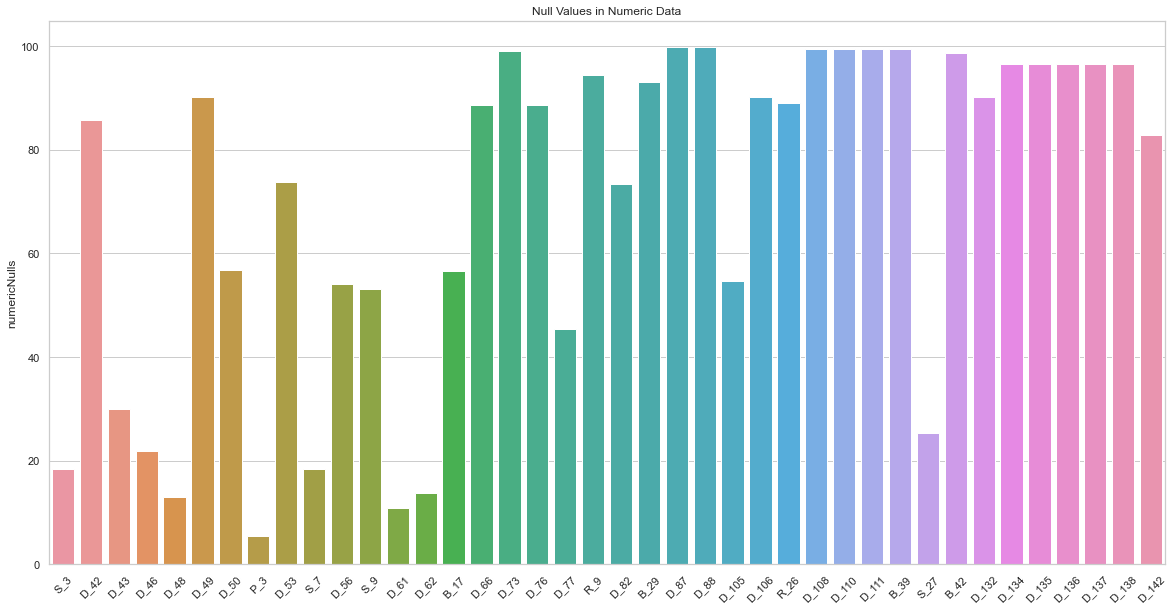

In [65]:
#Checking percantage of null values in numeric
numericNulls = nullVals(train_data_numeric)
pctNulls = 5
numericNulls = numericNulls[numericNulls > pctNulls]

#To DF
numericNullsDf = numericNulls.to_frame(name = 'numericNulls')

# figure for missing values
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=numericNullsDf.index,\
                 y=numericNullsDf.numericNulls,\
                 data=numericNullsDf).\
set(title='Null Values in Numeric Data')


plt.xticks(rotation=45)
plt.show()

In [34]:
print('Number of columns with nulls above' + \
      str(pctNulls) + '% is -> ' + str(numericNulls.shape[0]))

Number of columns with nulls above5% is -> 40
